In [28]:
# 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts0nanum* -qq

E: Unable to locate package fonts0nanum*
E: Couldn't find any package by glob 'fonts0nanum*'
E: Couldn't find any package by regex 'fonts0nanum*'


In [2]:
import matplotlib.font_manager as fm
fm._rebuild()

In [3]:
#한글폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name+" = "+ fontInfo.fname)

In [4]:
#그래프 라이브러리에 한글폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') #그래프 한글 폰트 설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

In [2]:
train = pd.read_csv('/content/drive/MyDrive/슬기로운 건강생활/국민건강보험공단_건강검진정보_20211229.CSV', encoding='cp949')
train

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [3]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

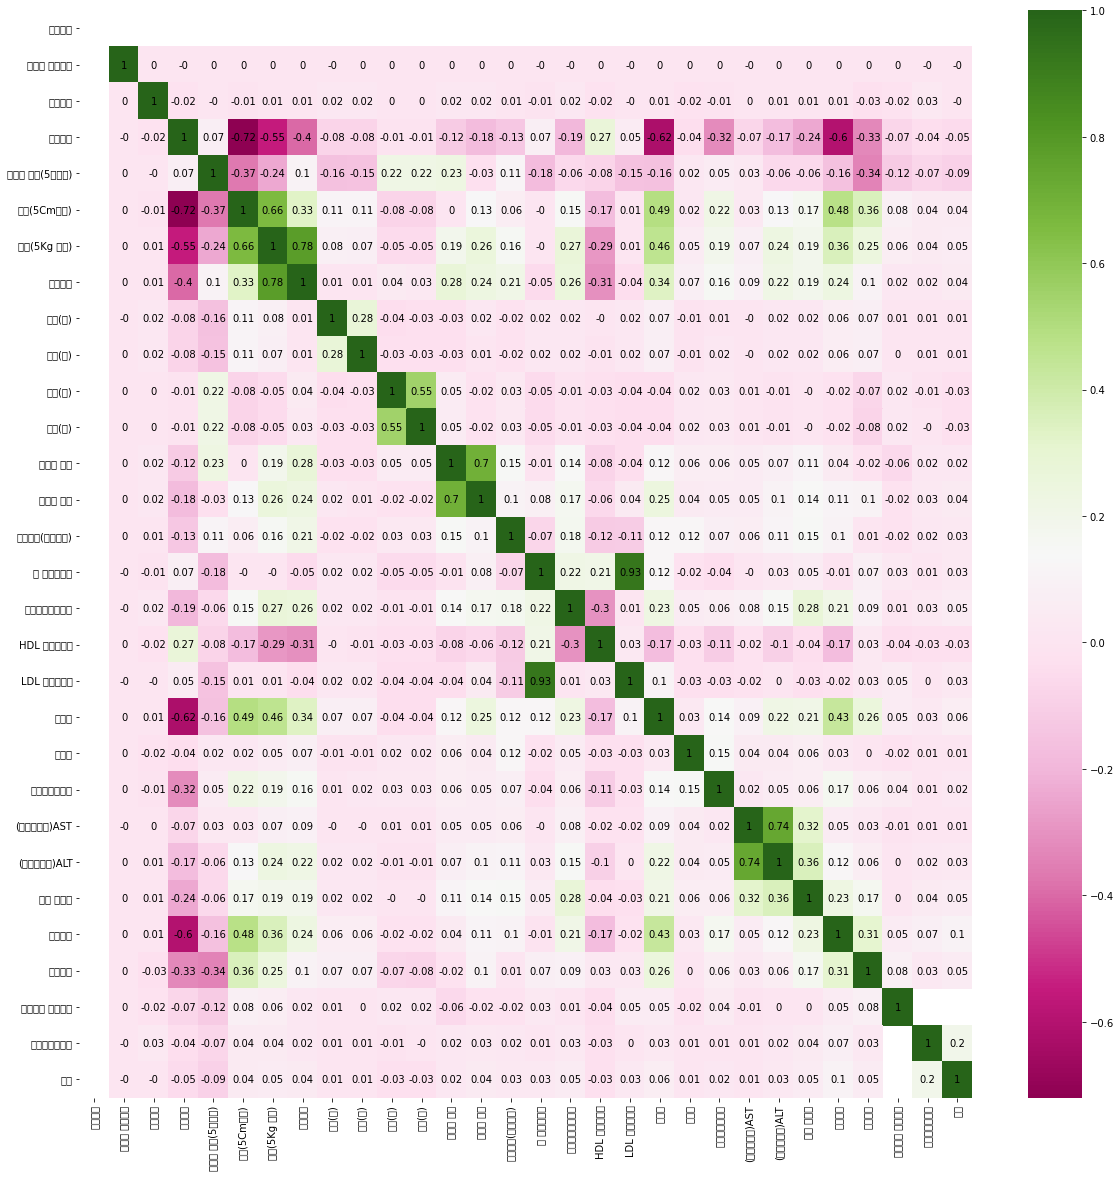

In [9]:
corr_df = train.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))

cor_abs = abs(train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='총 콜레스테롤').index # price과 correlation이 높은 column 10개 뽑기(내림차순)

plt.figure(figsize=(20,20))   #아 이부분이 아래로 내려가면 크기 변경에 영향을 못 주는구나..!
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='black'), cmap='PiYG')   #YlGnBu, RdBu 도 이쁨
plt.show()

In [10]:
# 총 콜레스테롤 에 대한 다른 변수들의 상관관계
co = pd.DataFrame(corr_df["총 콜레스테롤"].sort_values(ascending = False))  #Price에 대한 다른 변수 수치 뽑기, 내림차순 정렬
co.style.background_gradient(cmap='viridis')    #스타일 지정해서 범위 별 색깔 입히기

,총 콜레스테롤
총 콜레스테롤,1.000000
LDL 콜레스테롤,0.930000
트리글리세라이드,0.220000
HDL 콜레스테롤,0.210000
혈색소,0.120000
이완기 혈압,0.080000
성별코드,0.070000
음주여부,0.070000
감마 지티피,0.050000
구강검진 수검여부,0.030000


In [11]:
# (혈청지오티)ALT에 대한 다른 변수들의 상관관계
co = pd.DataFrame(corr_df["(혈청지오티)ALT"].sort_values(ascending = False))  #Price에 대한 다른 변수 수치 뽑기, 내림차순 정렬
co.style.background_gradient(cmap='viridis')    #스타일 지정해서 범위 별 색깔 입히기

,(혈청지오티)ALT
(혈청지오티)ALT,1.000000
(혈청지오티)AST,0.740000
감마 지티피,0.360000
체중(5Kg 단위),0.240000
혈색소,0.220000
허리둘레,0.220000
트리글리세라이드,0.150000
신장(5Cm단위),0.130000
흡연상태,0.120000
식전혈당(공복혈당),0.110000


기준년도 : 0
가입자 일련번호 : 0
시도코드 : 0
성별코드 : 0
연령대 코드(5세단위) : 0
신장(5Cm단위) : 0
체중(5Kg 단위) : 0
허리둘레 : 108
시력(좌) : 257
시력(우) : 252
청력(좌) : 222
청력(우) : 230
수축기 혈압 : 7532
이완기 혈압 : 7534
식전혈당(공복혈당) : 7602
총 콜레스테롤 : 597694
트리글리세라이드 : 597678
HDL 콜레스테롤 : 597685
LDL 콜레스테롤 : 605529
혈색소 : 7611
요단백 : 12141
혈청크레아티닌 : 7602
(혈청지오티)AST : 7601
(혈청지오티)ALT : 7602
감마 지티피 : 7603
흡연상태 : 343
음주여부 : 196
구강검진 수검여부 : 0
치아우식증유무 : 668617
치석 : 668618
데이터 공개일자 : 0


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, fl

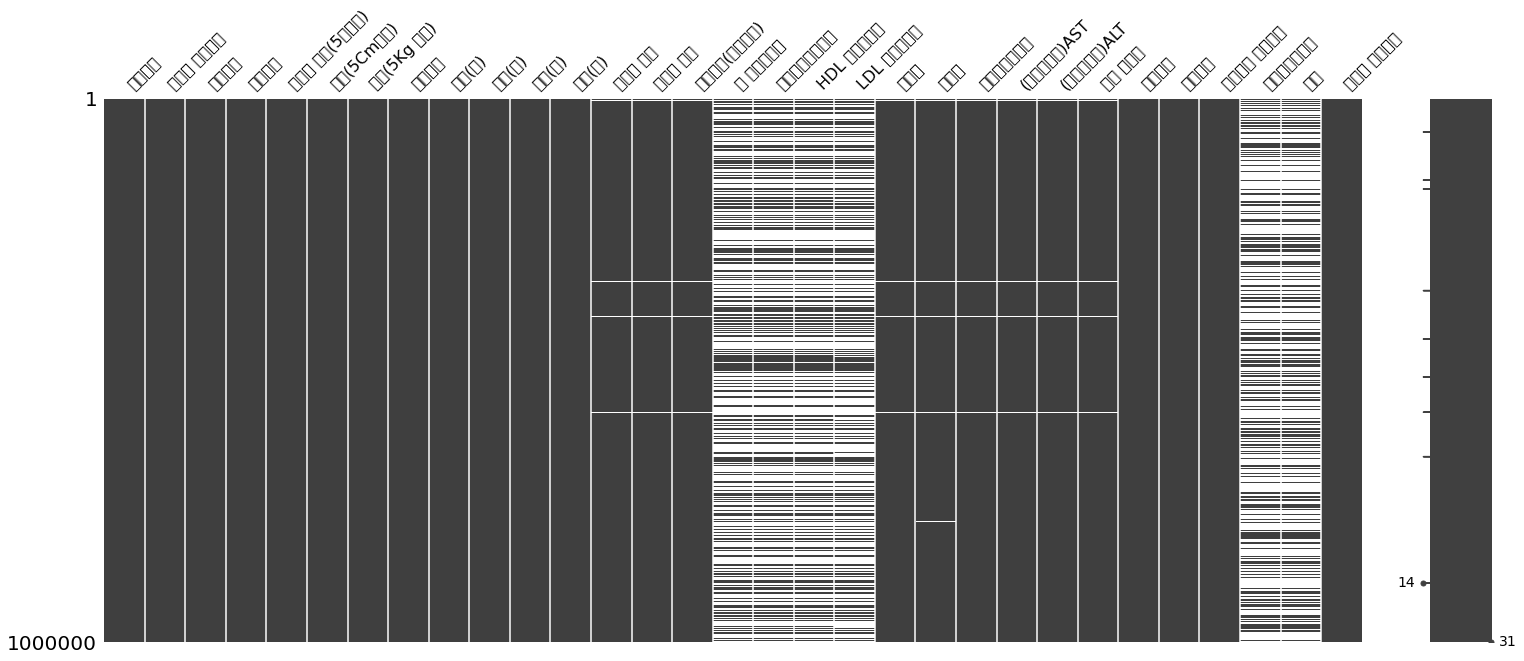

In [12]:
msno.matrix(train)
for c in train.columns:
    print('{} : {}'.format(c, len(train.loc[pd.isnull(train[c]), c].values)))

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_

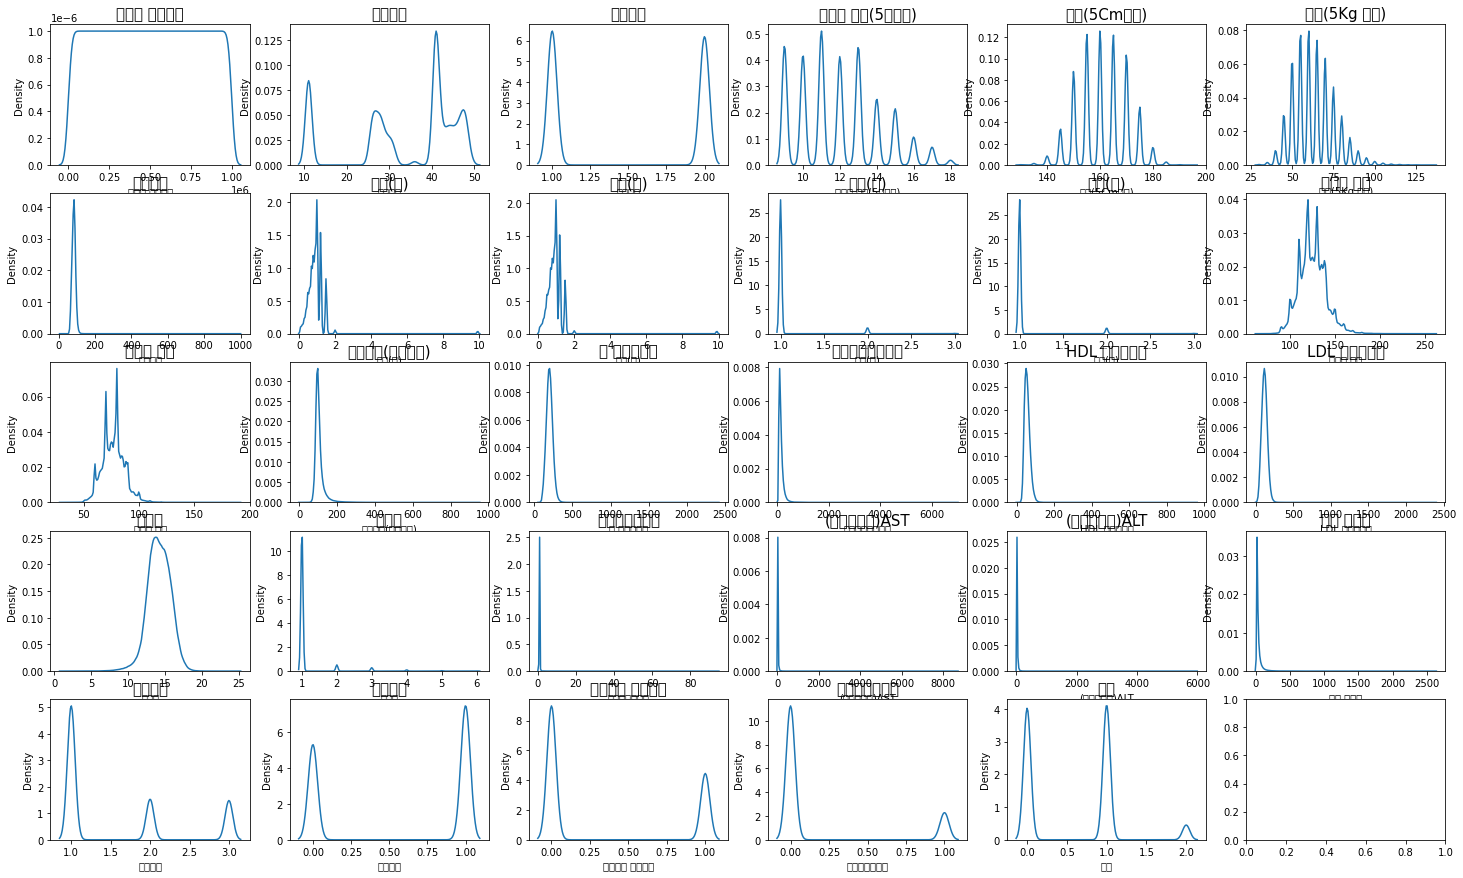

In [15]:
ig, ax = plt.subplots(5, 6, figsize=(25, 15))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = train.columns
for row in range(5):
    for col in range(6):
        sns.kdeplot(data=train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

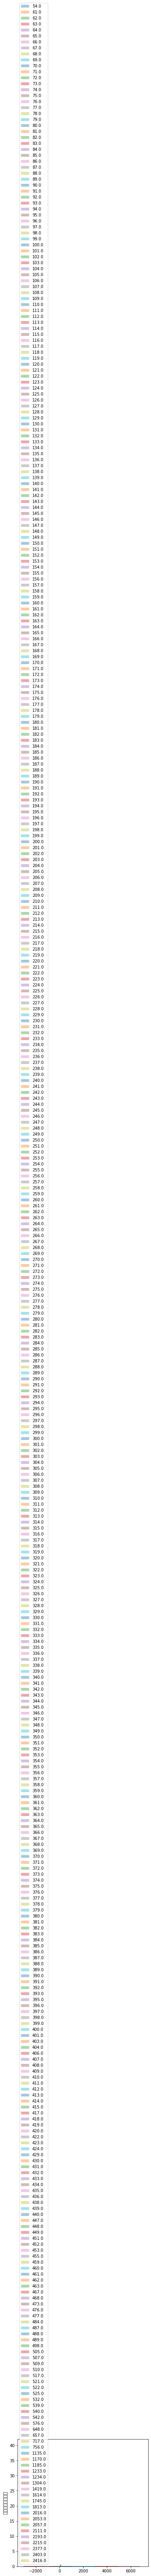

In [5]:
import scipy.stats as stats

feature = ['트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤']

corr_feature = train[feature].corr()

fig = plt.figure(figsize=(20,20))

n_feature = len(feature)
for i in range(n_feature):
    for j in range(n_feature):
      ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j+ 1)

      grouped = train.groupby('총 콜레스테롤')
      for index, items in grouped:
        if i ==j:
          sns.distplot(items[feature[i]].values, bins=40, label=index)
        else:
          plt.scatter(feature[j], feature[i], data=items, s=9, label=index)

        plt.legend()
      if i == n_feature-1:
        plt.xlabel(feature[j], fontsize=12)
      if j == 0:
        plt.ylabel(feature[i], fontsize=12)
      ax.annotate(np.round(corr_feature.loc[feature[i], feature[j]], 3), xy=(1,0), xycoords='axes fraction', fontsize=16,horizonatalalignment='right', verticalalignment='bottom')

plt.show()
      